<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/21_countplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: countplot

In [ ]:
import seaborn as sns

In [ ]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds = diamonds[diamonds.clarity.isin(['SI1', 'VS2'])]

In [ ]:
diamonds.shape

(25323, 10)

## Basics

In [ ]:
sns.set_style('darkgrid')

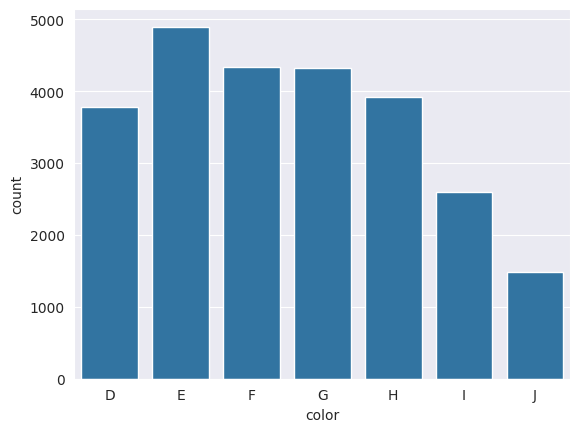

In [ ]:
sns.countplot(x='color', data=diamonds)

In [ ]:
diamonds.color.value_counts(sort=False)

,count
color,
D,3780
E,4896
F,4332
G,4323
H,3918
I,2593
J,1481


### Horizontal Countplot

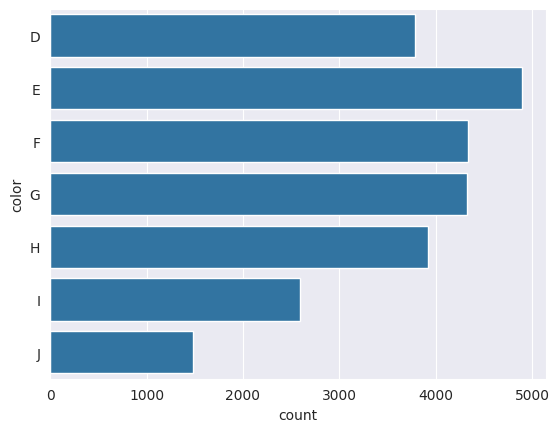

In [ ]:
sns.countplot(y='color', data=diamonds)

## Options

### `order`

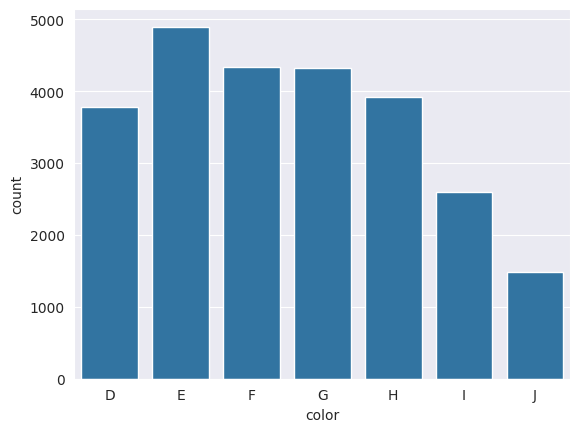

In [ ]:
sns.countplot(x='color', data=diamonds)

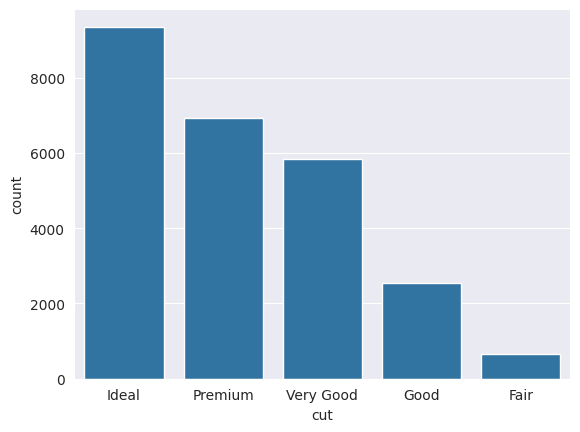

In [ ]:
sns.countplot(x='cut', data=diamonds)

In [ ]:
diamonds.dtypes

,0
carat,float64
cut,category
color,category
clarity,category
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
diamonds.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [ ]:
diamonds.cut.cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

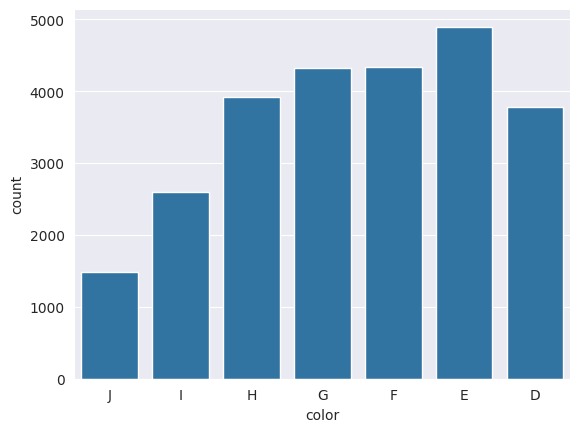

In [ ]:
color_order=['J', 'I', 'H', 'G', 'F', 'E', 'D']

sns.countplot(x='color', data=diamonds, order=color_order)

### Order Ascending or Descending

In [ ]:
diamonds.color.value_counts().index

CategoricalIndex(['E', 'F', 'G', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category', name='color')

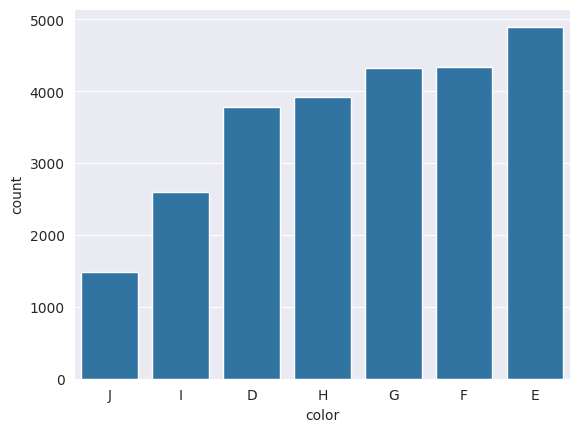

In [ ]:
sns.countplot(x='color', data=diamonds,
              order=diamonds.color.value_counts().index[::-1]  #remove [::-1] for descending
             )

### `hue`, `hue_order`

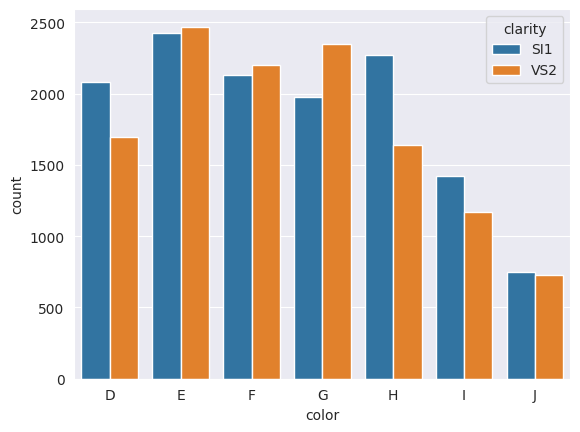

In [ ]:
sns.countplot(x='color', data=diamonds, hue='clarity', hue_order=['SI1', 'VS2'])

## Styling

### `color` and `palette`

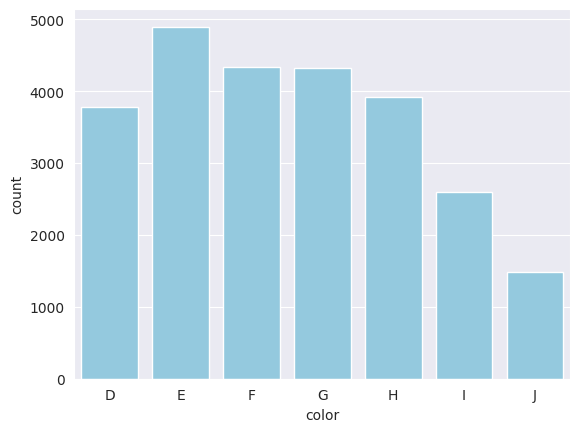

In [ ]:
sns.countplot(x='color', data=diamonds, color='skyblue')

<Axes: xlabel='color', ylabel='count'>

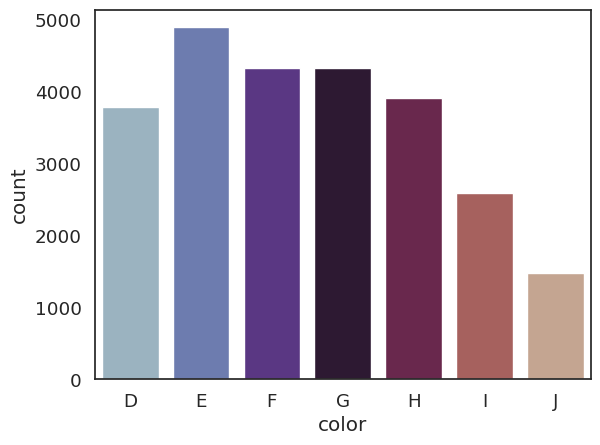

In [ ]:
sns.countplot(x='color',
    hue='color',
    data=diamonds,
    palette='twilight',
    legend=False)

### Other Matplotlib Properties

<Axes: xlabel='color', ylabel='count'>

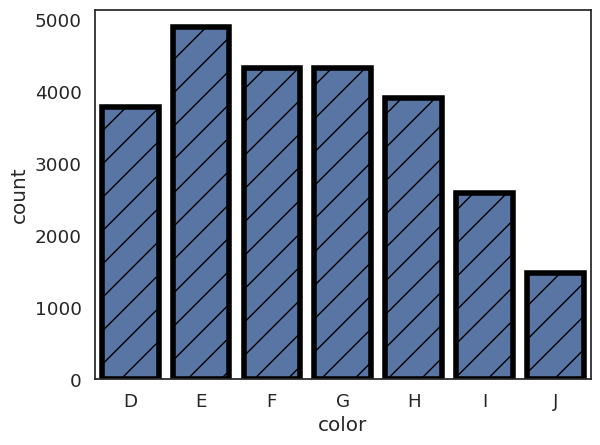

In [ ]:
sns.countplot(x='color', data=diamonds,
              lw=4, ec='black', hatch='/'
             )

## Examples, Thumbnail

In [ ]:
from matplotlib import pyplot as plt

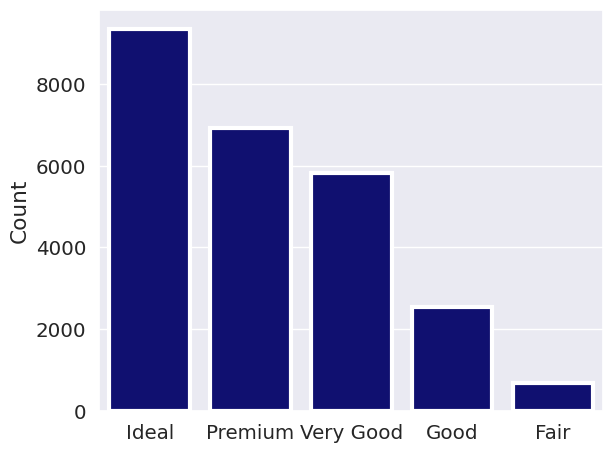

In [ ]:
sns.set(style='darkgrid', font_scale=1.3)
sns.countplot(x='cut', data=diamonds, color='navy', lw=3)
plt.xlabel('')
plt.ylabel('Count')


plt.tight_layout()
plt.savefig('20countplot_image_countplotExample.png', dpi=200)

In [ ]:
sns.set_style('white')

import pandas as pd

df = pd.DataFrame({'Animal': ['dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog'],
                   'Weight': [55, 8, 12, 25, 100, 10, 60]
                  })

In [ ]:
df

,Animal,Weight
0,dog,55
1,cat,8
2,cat,12
3,dog,25
4,dog,100
5,cat,10
6,dog,60


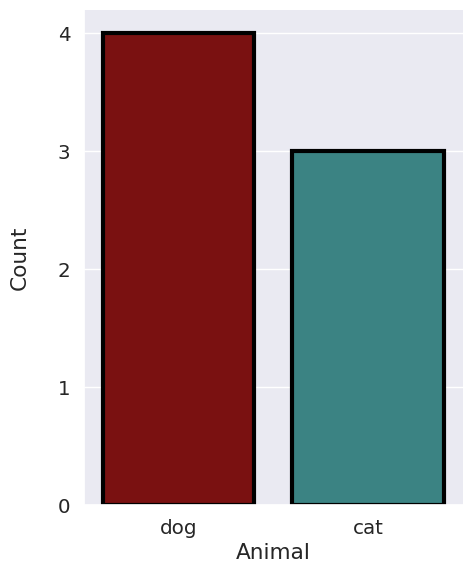

In [ ]:
plt.figure(figsize=(5, 6))

sns.countplot(x='Animal',hue='Animal', data=df, ec='black', lw=3, palette=['darkred', '#2F8F8F'])

plt.yticks([0, 1, 2, 3, 4])
plt.ylabel('Count', labelpad=20)

sns.despine()

plt.tight_layout()
plt.savefig('21countplot_figure_dogsCats.svg')

In [ ]:
df.groupby('Animal').Weight.mean()

,Weight
Animal,
cat,10.0
dog,60.0


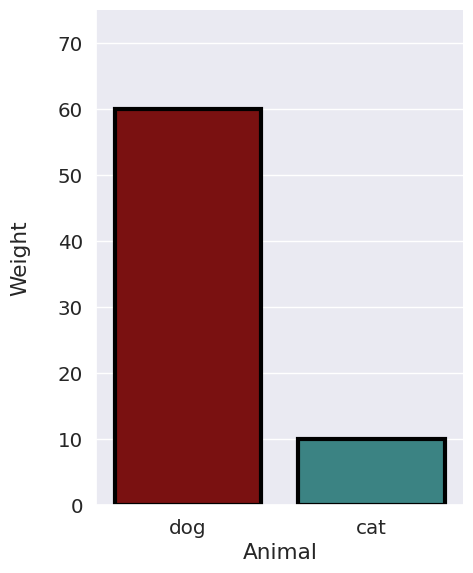

In [ ]:
plt.figure(figsize=(5, 6))

sns.barplot(x='Animal', y='Weight',hue='Animal', data=df, ec='black', lw=3,
            palette=['darkred', '#2F8F8F'],
            errorbar=None
           )

plt.ylim(0, 75)
plt.ylabel('Weight', labelpad=20)

sns.despine()

plt.tight_layout()
plt.savefig('21countplot_figure_dogsCats_bar_noCI.svg')

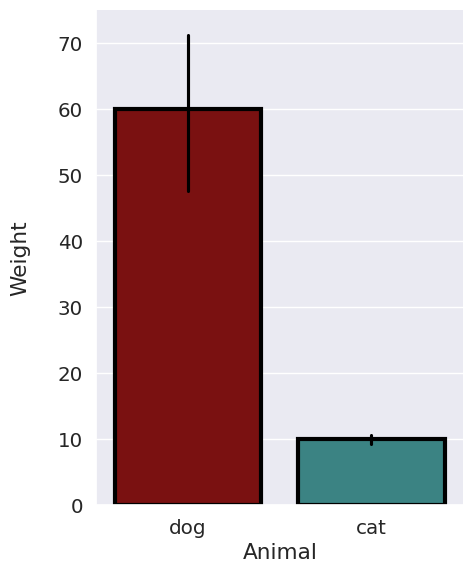

In [ ]:
plt.figure(figsize=(5, 6))

sns.barplot(x='Animal', y='Weight',hue='Animal',data=df, ec='black', lw=3,
            palette=['darkred', '#2F8F8F'],
            errorbar=('ci', 68), err_kws={'color': 'black'}
           )

plt.ylim(0, 75)
plt.ylabel('Weight', labelpad=20)

sns.despine()

plt.tight_layout()
plt.savefig('21countplot_figure_dogsCats_bar_withCI.svg')

### Thumb

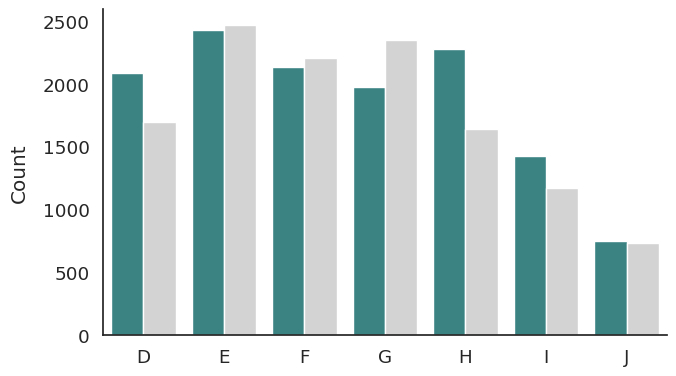

In [ ]:
plt.figure(figsize=(7,4))
sns.set(style='white', font_scale=1.2)
ax = sns.countplot(x='color', data=diamonds,
                   hue='clarity', hue_order=['SI1', 'VS2'],
                   palette=['#2F8F8F', 'lightgray'])
ax.legend([], frameon=False)
sns.despine()

plt.xlabel('')
plt.ylabel('Count', labelpad=10)
plt.tight_layout()
plt.savefig('21countplot_image_thumb.png', dpi=200)